# Ch.5 Regression

## 5.4 보스턴 주택 가격 예측

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [5]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bostonDF.shape

(506, 14)

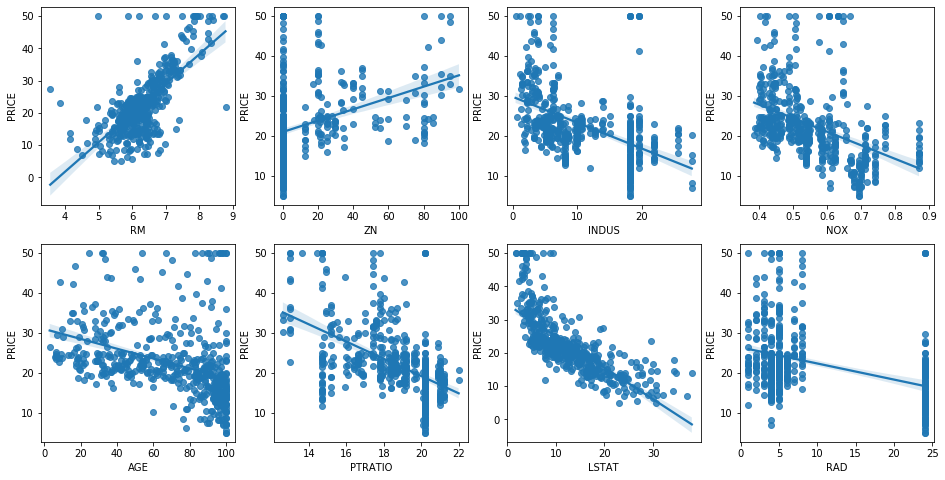

In [7]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [8]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 단일 변수에 대한 선형 회귀

In [10]:
X = bostonDF['RM']
Y = boston.target

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=2019)

- 모델 불러와 객체 생성

In [12]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [13]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [14]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

- 결과 확인하기

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1795128921483402

- 계수 w(weight), 절편 b(bias)

In [16]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식 : PRICE = 9.99*RM - 40.09

- 산점도와 회귀선 그리기

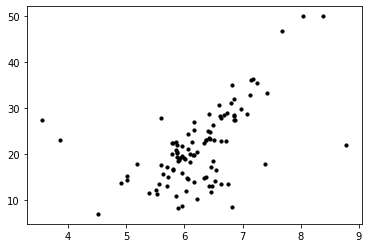

In [17]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [18]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

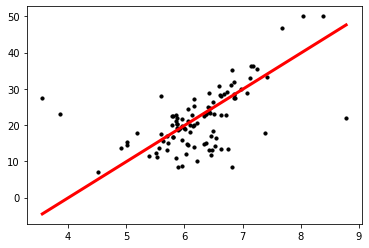

In [19]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [20]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

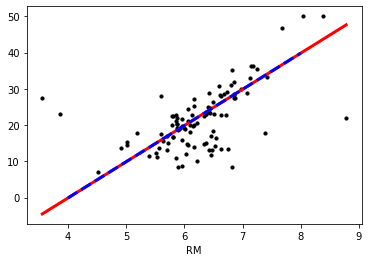

In [21]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, ys, c='blue', lw=3, ls='--')
plt.xlabel('RM')
plt.show()

In [22]:
# 그래프에 한글 표시
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 14

In [23]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

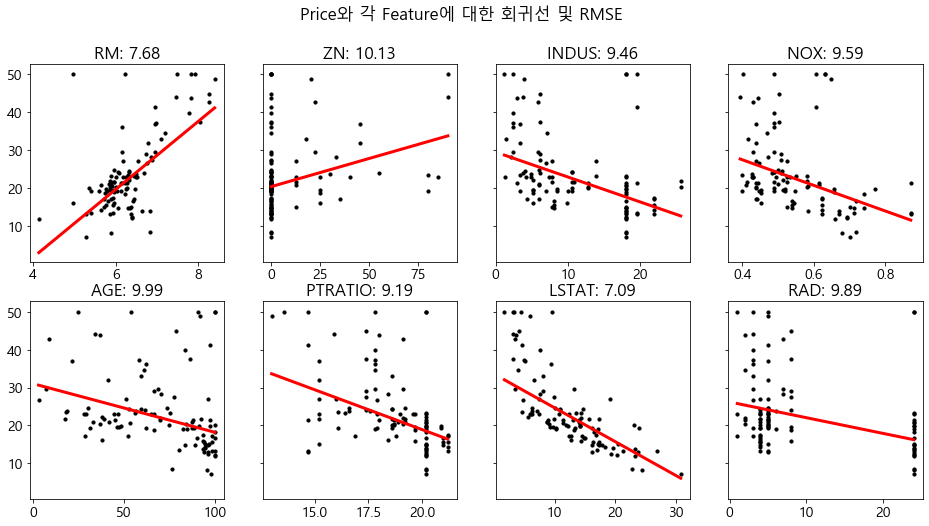

In [24]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2, sharey=True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for index, feature in enumerate(lm_features):
    X = bostonDF[feature]
    x_train, x_test, y_train, y_test = \
        train_test_split(X, boston.target, test_size=0.2, 
                         random_state=19)
    rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)

    row = index // 4
    col = index % 4
    ax = axs[row][col]
    ax.scatter(x_test, y_test, s=10, c='black')
    xline = np.array([np.min(x_test), np.max(x_test)])
    yline = weight * xline + bias
    ax.plot(xline, yline, c='red', lw=3)
    ax.set_title(feature+': '+str(rmse))

fig.suptitle("Price와 각 Feature에 대한 회귀선 및 RMSE")
plt.show()

## Price와 LSTAT의 다양한 회귀 방법에 따른 RMSE 값

In [35]:
x_train, x_test, y_train, y_test = \
    train_test_split(bostonDF['LSTAT'], boston.target, 
                     test_size=0.2, random_state=19)

### 1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = slr.predict(x_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

### 2. Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = dtr.predict(x_test.values.reshape(-1,1))
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

### 3. Support Vector Machine Regressor

In [38]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = svr.predict(x_test.values.reshape(-1,1))
rmse_svr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

In [39]:
print(rmse_lr, rmse_dtr, rmse_svr)

7.09 6.16 7.03


### 다중 회귀

In [42]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace=False)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [47]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [48]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [55]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace=False)
lr = LinearRegression()

In [56]:
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


### 5.5 다항 회귀

In [64]:
from sklearn.preprocessing import PolynomiaFeatures

poly = PolynomiaFeatures(degree = 2)

X = bostonDF['LSTAT']
pf = poly.fit_transform(X.values.reshape(-1.1))

ImportError: cannot import name 'PolynomiaFeatures' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [59]:
pf.shape

NameError: name 'pf' is not defined

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.2, random_state = 2019)
pf_train = poly.fit_transform(X_train.values.reshape(-1,1))
pf_test = poly.fit_transform(X_test.values.reshape(-1,1))

NameError: name 'y' is not defined

In [63]:
lr = LinearRegression()
lr.fit(pf_train,y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
rmse

NameError: name 'pf_train' is not defined

In [65]:
xs = np.linspace(np.min(x_test), np.max(x_test), 100)
line_x = poly.fit_transform(xs.reshape(-1,1))
line_y = lr.predict(line_x)
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x,line_y, c='red', lw=3)
plt.xlim(0,31)
plt.xlabel('LSTAT')
plt.show()

NameError: name 'poly' is not defined

### 5.6 - 규제 선형 모델 

### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE : 5.518


In [73]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


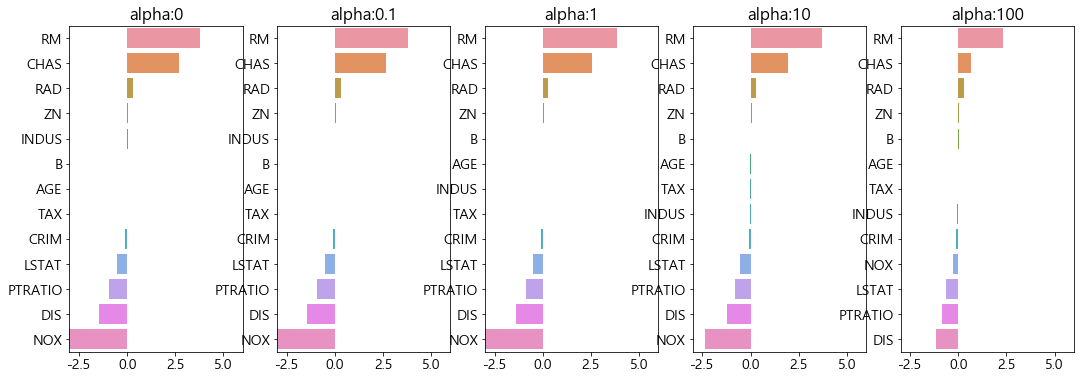

In [75]:
fig, axs = plt.subplots(figsize=(18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]= coeff
    
    coeff = coeff.sort_values(ascending = False)
    
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])
    
plt.show()

In [77]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

In [78]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df


In [79]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


In [80]:
sort_column = 'alpha : '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha : 0.07'

In [81]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [82]:
sort_column = 'alpha:'+ str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 5.7 로지스틱 회귀

### w값과 b값에 따른 시그모이드 함수의 변화

In [87]:
def sigmoid(x,w,b):
    return 1 / (1 + np.exp(-(w*x+b)))

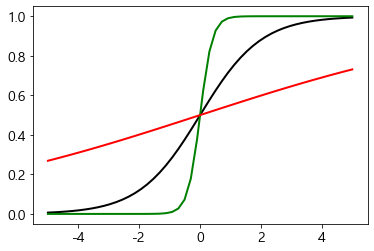

In [88]:
xs = np.linspace(-5, 5)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y02 = sigmoid(xs, 0.2, 0)
plt.plot(xs, y1, lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y02, lw=2, c='r')
plt.show()

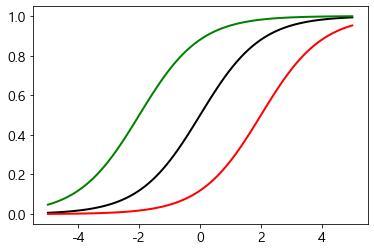

In [89]:
xs = np.linspace(-5, 5, 100)
y0 = sigmoid(xs, 1, 0)
y2p = sigmoid(xs, 1, 2)
y2m = sigmoid(xs, 1, -2)
plt.plot(xs, y0, lw=2, c='k')
plt.plot(xs, y2p, lw=2, c='g')
plt.plot(xs, y2m, lw=2, c='r')
plt.show()


### 5.7 로지스틱 회귀

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [5]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty':['l2','l1'],'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\